# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats as stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df.loc[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Misty\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


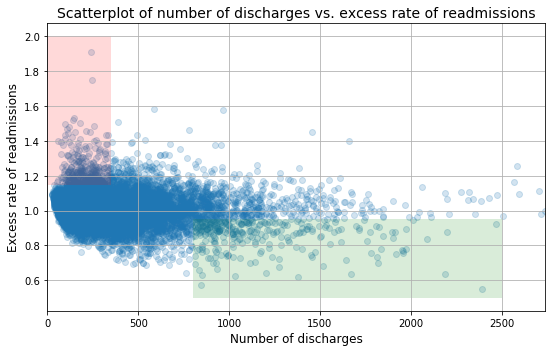

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### A. Do you agree with the above analysis and recommendations? Why or why not?

No, I don't agree with the analysis.  First of all, I need to see a regression line or correlation calculated.  I've done that below.  With a correlation of -0.093 over the entire population, I disagree that there's a strong enough relationship on which to base these conclusions.  Further, when you look at the correlation coefficients in the small (-0.174, mild) and large (-0.050, practically nonexistant) populations, you see that there's very little correlation in the categories themselves.  I don't see any reason to state that there is a definite relationship.

I also disagree with the policy recommendations.  Smaller hospitals serve several purposes.  Some of the centers in the list are specialist centers that focus on sicker people, and others serve rural areas where consolidation will lead to higher travel times and more deaths.  This analysis doesn't take into account any survival rates.  Is there a statistically significant difference in the survival rates at these hospitals?  What if larger hospitals have lower readmission rates because more patients have died?  Readmission alone tells us nothing about the quality of care or the current level of resource allocation.

Correlation (population): -0.09309554287590441


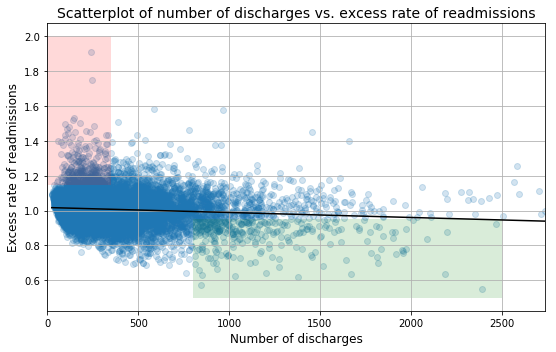

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
x = np.array(x)
y = np.array(y)

m,b = np.polyfit(x, y, 1) 

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
ax = plt.plot(x, m*x+b, 'black')
fig.tight_layout()

pearson = stats.pearsonr(x, y)
print('Correlation (population):', stats.pearsonr(x, y)[0])

#### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Setup an appropriate hypothesis test.

H0: mu1 == mu2, or There is no statistical difference in the means of the small (n < 100) and large (n > 1000) hospitals.
Ha: mu1 != mu2, or There is a statistical difference in the means.

With a t of ~7.6 and a p-value of < .0001, we reject H0 and conclude that there is a statistical difference in the populations of interest.

With the small hospitals having a mean readmit rate of 1.023 and the larger hospitals having a mean readmit rate of 0.978, there is little practical difference in the populations.  If you change small hopsitals to be n<300, the mean is then 1.014.  The new t is ~6.3 and p-value is still < .0001 and H0 should still be rejected.

In [6]:
# Compute and report the observed significance value (or p-value).
# Report statistical significance for  𝛼  = .01.

#clean_hospital_read_df.info()

# Clean up the rows where the columns of interest are null.
df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions'])
#df.info()

# Split the data into the two groups of interest based on the numbers in the original analysis.
df_fewer_than_100_discharges = df.loc[df['Number of Discharges'] < 100]
df_more_than_1000_discharges = df.loc[df['Number of Discharges'] > 1000]
mu1 = np.mean(df_fewer_than_100_discharges['Excess Readmission Ratio'])
mu2 = np.mean(df_more_than_1000_discharges['Excess Readmission Ratio'])
df_test_300 = df.loc[df['Number of Discharges'] < 300]
mu3 = np.mean(df_test_300['Excess Readmission Ratio'])

# T-test is used for a difference in two independent populations.
t, pval = stats.ttest_ind(df_fewer_than_100_discharges['Excess Readmission Ratio'], df_more_than_1000_discharges['Excess Readmission Ratio'], equal_var=False)
print('t (n<100) = {:.4f}'.format(t))
print('p-value = {:.13f}'.format(pval))
print('mu1 (n<100) = {:.4f}'.format(mu1))
print('mu1 (n>1000) = {:.4f}'.format(mu2))

# T-test for n<300.
t_300, pval_300 = stats.ttest_ind(df_test_300['Excess Readmission Ratio'], df_more_than_1000_discharges['Excess Readmission Ratio'], equal_var=False)
print('t (n<300) = {:.4f}'.format(t_300))
print('p-value = {:.13f}'.format(pval_300))
print('Inclusion of the population in the recommendations that was not in original analysis (n<300) new mean = {:.4f}'.format(mu3))

# Get the new correlation for the two smaples.
x_s = [a for a in df_fewer_than_100_discharges['Number of Discharges'][81:-3]]
y_s = list(df_fewer_than_100_discharges['Excess Readmission Ratio'][81:-3])
x_l = [a for a in df_more_than_1000_discharges['Number of Discharges'][81:-3]]
y_l = list(df_more_than_1000_discharges['Excess Readmission Ratio'][81:-3])
print('Correlation: (n<100)', stats.pearsonr(x_s, y_s)[0])
print('Correlation: (n>1000)', stats.pearsonr(x_l, y_l)[0])

t (n<100) = 7.6017
p-value = 0.0000000000001
mu1 (n<100) = 1.0226
mu1 (n>1000) = 0.9783
t (n<300) = 6.3252
p-value = 0.0000000005657
Inclusion of the population in the recommendations that was not in original analysis (n<300) new mean = 1.0142
Correlation: (n<100) -0.17395663657166147
Correlation: (n>1000) -0.05042898206535658


#### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

As stated above, there is a statistical significance based on the data available.  Practically, the difference in the groups is small, and there's little correlation inside the groups.  My recommendations remain as stated in A.

#### # Look at the scatterplot above.  What are the advantages and disadvantages of using this plot to convey information?  Construct another plot that conveys the same information in a more direct manner.

I don't understand the point of the original green box.  It doesn't show me anything or help me understand the distribution in question.  The red box is a bit more helpful for drawing my attention to the higher readmit rates.

I have chosen to make a Seaborn joint plot with scatter, kde, and histogram to better show the replationships and distribution.  Using this plot, we can see that the data is heavily skewed toward the smaller hospitals.  I also removed the three outliers over 3,000 discharges that pulled the regression line down slightly.  (Correlation with outliers: -0.097.  Correlation without outliers: -0.093.)  We can also now easily see that the data is normally distributed around 1.0.

C:\Users\Misty\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Misty\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


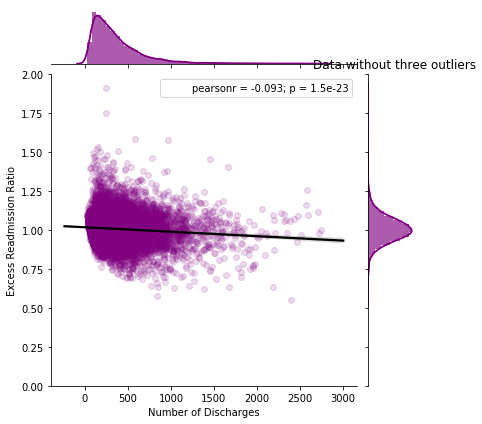

In [7]:
# Get rid of the three outliers to make it easier to see
df2 = df.loc[df['Number of Discharges'] < 3000]

# Make a Seaborn joint plot with scatter, kde, and histogram
__ = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df2, kind='reg', 
                  color='purple', joint_kws={'line_kws':{'color':'black'}}, scatter_kws={'alpha': 0.15}
                 ).plot_marginals(sns.distplot, color='purple').annotate(stats.pearsonr)
__ = plt.margins(0.2)
__ = plt.ylim((0,2))
__ = plt.title('Data without three outliers')

plt.show()